In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def createStates(stationCapacity, maxArrivals):
    S = []
    V_t1 = {}
    V_t = {}
    newPolicy = {}
    oldPolicy = {}
    for state1 in range(0, stationCapacity + 1):
        for state2 in range(0, stationCapacity + 1):
            for state3 in range(0, stationCapacity + 1):
                for state4 in range(0, stationCapacity + 1):
                    for state5 in range(0, stationCapacity + 1):
                        S.append([state1, state2, state3, state4, state5])
                        V_t1[(state1, state2, state3, state4, state5)] = 0
                        V_t[(state1, state2, state3, state4, state5)] = 0
                        newPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        oldPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        
    
    E = []
    for env1 in range(1, maxArrivals + 1):
        for env2 in range(1, maxArrivals + 1):
            for env3 in range(1, maxArrivals + 1):
                for env4 in range(1, maxArrivals + 1):
                    for env5 in range(1, maxArrivals + 1):
                        E.append([env1, env2, env3, env4, env5])
    return S, V_t1, V_t, newPolicy, oldPolicy, E

def getReward(c_f, c_h, a, s, K, stationCapacity):
    return a * c_f + sum(getNextState(a, s, K, stationCapacity) * c_h)

def getNextState(a, s, K, stationCapacity, env=np.array([0,0,0,0,0])):
    s=np.clip(np.add(s, env), 0, stationCapacity)
    s_prime = s.copy()
    if a == 1:
        for i in range(len(s_prime)-1, -1, -1):
            s_prime[i] = max(s_prime[i] - K, 0)
            K -= np.abs(s[i] - s_prime[i])
    return s_prime

def getExpectedValue(environments, state, S, action, shuttleCapacity, stationCapacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        s_prime = getNextState(action, state, shuttleCapacity, stationCapacity, env)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(E) * V_prime[tuple(s_prime)]
    # expected total value given the state and the action
    return reward + discount * value

In [5]:
def valueIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k):
    i = 0
    while delta > theta:
        delta = 0
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d))
            V_k1[tuple(s)] = max(expectedValues)
            if np.abs(V_k1[tuple(s)] - V_k[tuple(s)]) > delta:
                delta = np.abs(V_k1[tuple(s)] - V_k[tuple(s)])
        # update V_k to be the expected total values for V_k1 as we iterate forward through k
        print(i, delta)
        V_k = V_k1.copy()
        i += 1
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(V_k[(0,0,0,0,i)])
    plt.plot(plot_values)
    plt.show()
    return V_k

0 20.0
1 18.9999999999989
2 18.049999999999493
3 17.147500000003603
4 16.290125000000614
5 15.47561874999721
6 14.701837812496933
7 13.966745921873269
8 13.268408625786833
9 12.60498819449316
10 11.974738784768249
11 11.376001845530254
12 10.807201753258312
13 10.26684166558951
14 9.75349958232087
15 9.265824603207818
16 8.802533373052682
17 8.362406704401337
18 7.944286369171152
19 7.547072050718896
20 7.169718448174706
21 6.811232525768162
22 6.470670899473646
23 6.1471373544900985
24 5.839780486772327
25 5.54779146243294
26 5.270401889332902
27 5.0068817948671835
28 4.756537705115363
29 4.518710819856096
30 4.292775278868987
31 4.078136514933931
32 3.874229689180538
33 3.680518204719135
34 3.4964922944988643
35 3.3216676797641753
36 3.155584295768165
37 2.9978050809751835
38 2.8479148269173606
39 2.705519085585763
40 2.570243131322968
41 2.441730974750328
42 2.319644426000366
43 2.2036622047026526
44 2.0934790944772885
45 1.9888051397485356
46 1.8893648827703942
47 1.794896638627790

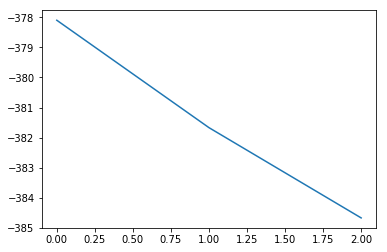

7022.527703762054

In [6]:
stationCapacity = 2
maxArrivals = 5
A = [0, 1]
K = 30
c_f = -100
c_h = np.array([-1, -1.5, -2, -2.5, -3])
d = 0.95
start = time.time()
theta = 10e-6
delta = 2
S, V_k1, V_k, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)
V_k = valueIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k)
end = time.time()
end - start